
   #                Analyzing Fuel Prices in Brazil (2004-2019)

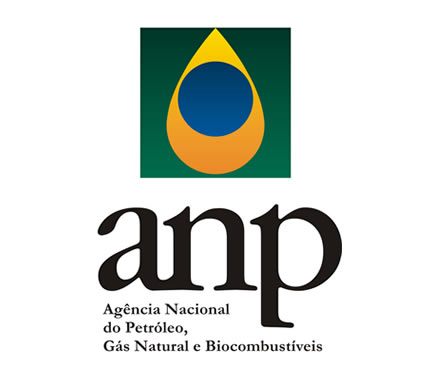                                                                       
____________


### Author: Rodrigo Brust

#### [Linkedin](https://www.linkedin.com/in/rodrigobrust/) | [Github](https://github.com/rodreras)
***

### Summary

`1.`[Introduction](#intro)

`2.`[Importing Data](#importando)

`3.`[Cleaning Data](#clean)
    
 `3.1`[Quality Issues](#quality)

 `3.2`[Tidy Issues](#tidy)

`4.`[Analyzing Data](#dados)

_____________________________

<a id='intro'></a>

### Introduction
This notebook aims to see the evolution of prices from 2004 to 2019.

Types of fuels: 
- Gasoline
- GNV
- Ethanol
- Diesel

The data are updated by the `ANP` weekly, in several registered posts all over the country. 

The idea is to visualize the data, as listed below: 

- Evolution of prices in the country per year 
- Evolution of prices per state per year
- Distribution of values in boxplot.

#### Structuring this notebook

1. First we will recognize the document, to understand faults, columns, and general information.
2. Next, we will clean the file in a separate file.
3. Then we will initialize the analyses.
4. Finally, there will be the final considerations.


<a id='importando'></a>
### Importing Data

In [1]:
#Importing the libraries that will be used for this analysis
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np
import matplotlib.dates as mdates
import seaborn as sb
import geopandas as gpd
from datetime import timedelta
import warnings
import warnings
warnings.simplefilter("ignore")

%matplotlib inline 

In [2]:
#Importing file
df_gas = pd.read_csv("2004-2019.tsv", sep ='\t',index_col=[0]) 
#\It means it's a tabspace. It is necessary because the file is separated by tabs

In [3]:
df_gas.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


In [4]:
#Checking dimensions
df_gas.shape

(106823, 20)

In [5]:
#Checking data types.
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106823 entries, 0 to 106822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   106823 non-null  object 
 1   DATA FINAL                     106823 non-null  object 
 2   REGIÃO                         106823 non-null  object 
 3   ESTADO                         106823 non-null  object 
 4   PRODUTO                        106823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   106823 non-null  int64  
 6   UNIDADE DE MEDIDA              106823 non-null  object 
 7   PREÇO MÉDIO REVENDA            106823 non-null  float64
 8   DESVIO PADRÃO REVENDA          106823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           106823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           106823 non-null  float64
 11  MARGEM MÉDIA REVENDA           106823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

In [6]:
#Looking for nulls
df_gas.isnull().sum()

DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
MÊS                              0
ANO                              0
dtype: int64

In [7]:
df_gas.describe()

,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA,MÊS,ANO
count,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000
mean,233.770976,10.870780,0.657227,9.416038,12.537731,0.045418,6.484006,2011.802271
std,403.282519,17.752533,1.349169,15.092193,20.841497,0.025066,3.443391,4.391530
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.000000,1.000000,2004.000000
25%,42.000000,2.072000,0.072000,1.900000,2.310000,0.029000,4.000000,2008.000000
50%,104.000000,2.718000,0.114000,2.510000,2.999000,0.041000,6.000000,2012.000000
75%,243.000000,3.752000,0.191000,3.499000,4.150000,0.058000,9.000000,2016.000000
max,4167.000000,99.357000,10.748000,90.000000,120.000000,0.395000,12.000000,2019.000000


***

<a id="clean"></a>
### Cleaning the data

<a id="quality"></a>
##### Problems involving quality

- It means that it has some insconsistencies in the file, for example the type of information

1 - The columns MARGEM MÉDIA REVENDA, PREÇO MÉDIO DISTRIBUIÇÃO, DESVIO PADRÃO DISTRIBUIÇÃO, PREÇO MÍNIMO DISTRIBUIÇÃO, PREÇO MÁXIMO DISTRIBUIÇÃO, COEF DE VARIAÇÃO DISTRIBUIÇÃO are as `object` while they should actually be `float`❌
> Will not be used, only up to column 8 (`medium resale price')

2 - START DATE and END DATE should be as `datetime` instead of `object`✅

3 - Rename the columns to lowercase and without spaces, everything to facilitate access. ✅

4 - Remove special characters from column titles. ✅

##### Problems involving storage 


- It means that it has some problems that involve structural problems. These rules must be respected according to Hadley Wickham: Tidying messy datasets: `a`.Each variable forms a column. `b`.Each observation forms a row. `c`.Each type of observational unit forms a table.

1 - Join the last two columns `ANO` and `MES` to `data` ✅

2 - Remove `data_final` column

3 - Remove columns that will not be used as for example: `desvio padrão revenda, preço mínimo revenda, preço máximo revenda, margem média revenda,coef de variação revenda, desvio padrão distribuição, preço mínimo distribuição, preço máximo distribuição, coef de variação distribuição`.
*** 
NOTE: when there was a symbol of ✅ at the end of the sentence it means that the problem was solved.
***


In [8]:
#First, let's create a new dataframe, then clean the data.
gas = df_gas.copy()

***

#### Cleaning up quality problems
[See the list](#quality)

##### Definition

- Change column headers to lowercase letters with the .lower() function

##### Code

In [9]:
#Making columns header as lowercase 
gas.columns = [x.lower() for x in gas.columns]

In [10]:
gas.columns

Index(['data inicial', 'data final', 'região', 'estado', 'produto',
       'número de postos pesquisados', 'unidade de medida',
       'preço médio revenda', 'desvio padrão revenda', 'preço mínimo revenda',
       'preço máximo revenda', 'margem média revenda',
       'coef de variação revenda', 'preço médio distribuição',
       'desvio padrão distribuição', 'preço mínimo distribuição',
       'preço máximo distribuição', 'coef de variação distribuição', 'mês',
       'ano'],
      dtype='object')

***
##### Definition

- Change the spaces between the words in the columns with the .str.replace() function

##### Code

In [11]:
#Removendo os espaços e trocando por underlines (_)
gas.columns = gas.columns.str.replace('\s', '_')

In [12]:
gas.columns

Index(['data_inicial', 'data_final', 'região', 'estado', 'produto',
       'número_de_postos_pesquisados', 'unidade_de_medida',
       'preço_médio_revenda', 'desvio_padrão_revenda', 'preço_mínimo_revenda',
       'preço_máximo_revenda', 'margem_média_revenda',
       'coef_de_variação_revenda', 'preço_médio_distribuição',
       'desvio_padrão_distribuição', 'preço_mínimo_distribuição',
       'preço_máximo_distribuição', 'coef_de_variação_distribuição', 'mês',
       'ano'],
      dtype='object')

***
##### Definition

- Change `datatype` of `data_inicial` & `data_final` columns with pd.to_datetime()

##### Code

In [13]:
gas.data_inicial = pd.to_datetime(gas['data_inicial'])
gas.data_final = pd.to_datetime(gas['data_final'])

In [14]:
print(gas.data_inicial.dtype, gas.data_final.dtype)

datetime64[ns] datetime64[ns]


***
##### Definition

- Remove special characters from columns headers with the str.replace() function

##### Code

In [15]:
gas.columns

Index(['data_inicial', 'data_final', 'região', 'estado', 'produto',
       'número_de_postos_pesquisados', 'unidade_de_medida',
       'preço_médio_revenda', 'desvio_padrão_revenda', 'preço_mínimo_revenda',
       'preço_máximo_revenda', 'margem_média_revenda',
       'coef_de_variação_revenda', 'preço_médio_distribuição',
       'desvio_padrão_distribuição', 'preço_mínimo_distribuição',
       'preço_máximo_distribuição', 'coef_de_variação_distribuição', 'mês',
       'ano'],
      dtype='object')

In [16]:
gas.columns = gas.columns.str.replace('ú', 'u')
gas.columns = gas.columns.str.replace('é', 'e')
gas.columns = gas.columns.str.replace('ç', 'c')
gas.columns = gas.columns.str.replace('ê', 'e')
gas.columns = gas.columns.str.replace('á','a')
gas.columns = gas.columns.str.replace('ã','a')
gas.columns = gas.columns.str.replace('í','i')

In [17]:
gas.columns

Index(['data_inicial', 'data_final', 'regiao', 'estado', 'produto',
       'numero_de_postos_pesquisados', 'unidade_de_medida',
       'preco_medio_revenda', 'desvio_padrao_revenda', 'preco_minimo_revenda',
       'preco_maximo_revenda', 'margem_media_revenda',
       'coef_de_variacao_revenda', 'preco_medio_distribuicao',
       'desvio_padrao_distribuicao', 'preco_minimo_distribuicao',
       'preco_maximo_distribuicao', 'coef_de_variacao_distribuicao', 'mes',
       'ano'],
      dtype='object')

***

#### Cleaning Tidy Issues
[Veja a lista](#tidiness)


##### Definition

- Join the last two columns (`mes`and `ano`), put them in one, and transform to pd.to_datetime()


##### Code

In [18]:
#Primeiro transformando para object para poder concaternar. Posteriormente será convertido.
gas.ano.astype(object)
gas.mes.astype(object)

0         5
1         5
2         5
3         5
4         5
         ..
106818    6
106819    6
106820    6
106821    6
106822    6
Name: mes, Length: 106823, dtype: object

In [19]:
#Criando uma nova coluna para agrupar o ano e o mês. Os valores estão sendo redirecionados como str.
#Creating a new column to group the year and month. The values are being redirected as str.
gas['data_base'] = gas['ano'].astype(str) +'-'+gas['mes'].astype(str)

#Uma vez concatenados, precisa-se alterar de str para datetime. Para isso, usaremos o pacote datetime.
# Once concatenated, you need to change from str to datetime. For that, we will use the datetime package.
gas.data_base = [dt.strptime(x,'%Y-%m') for x in gas.data_base]

#Aqui podemos ver que tudo foi convertido.
#Checking conversion
gas.data_base

0        2004-05-01
1        2004-05-01
2        2004-05-01
3        2004-05-01
4        2004-05-01
            ...    
106818   2019-06-01
106819   2019-06-01
106820   2019-06-01
106821   2019-06-01
106822   2019-06-01
Name: data_base, Length: 106823, dtype: datetime64[ns]

##### Definition

- Remove column `data_final` and all others that will not be used.

##### Code

In [20]:
gas = gas.drop(['data_final','desvio_padrao_revenda', 'preco_minimo_revenda',
       'preco_maximo_revenda', 'margem_media_revenda',
       'coef_de_variacao_revenda','desvio_padrao_distribuicao', 
          'preco_minimo_distribuicao', 'preco_maximo_distribuicao', 
          'coef_de_variacao_distribuicao'], axis = 1)

##### Definition

- Change the type of data in the column preco_medio_distribuicao. It is recognized as an obj, it will be transformed to float.


##### Code

In [21]:
#analisando quantas linhas estão com o sinal de -, o que impede a conversão.
len(gas[gas['preco_medio_distribuicao'].str.contains('-')])

3400

In [23]:
#trocando os - por vazio
#gas['preco_medio_distribuicao'] = gas[gas['preco_medio_distribuicao'].replace('',' ', inplace = True)]

In [24]:
#transformando preco_medio_distribuicao para float
gas['preco_medio_distribuicao'] = pd.to_numeric(gas.preco_medio_distribuicao, errors = 'coerce' )

In [25]:
gas.dtypes

data_inicial                    datetime64[ns]
regiao                                  object
estado                                  object
produto                                 object
numero_de_postos_pesquisados             int64
unidade_de_medida                       object
preco_medio_revenda                    float64
preco_medio_distribuicao               float64
mes                                      int64
ano                                      int64
data_base                       datetime64[ns]
dtype: object

In [26]:
#Saving CSV file 
gas.to_csv('gas_price_clean.csv', index = False)

***
<a id='dados'></a>

### Analyzing Data

TypeError: 'years' is an invalid keyword argument for __new__()

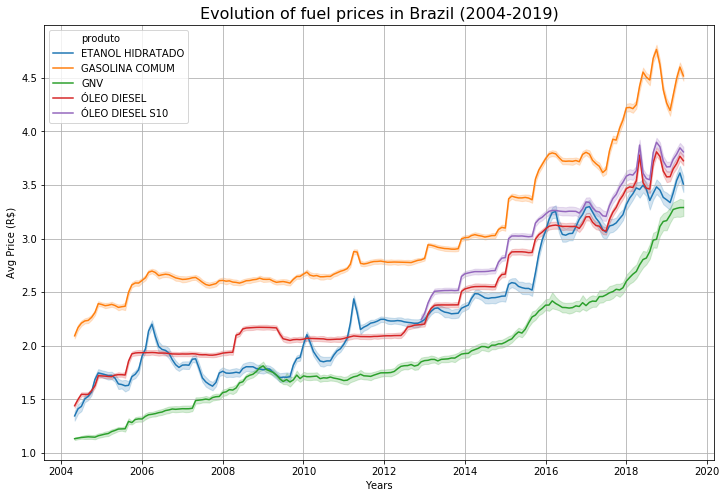

In [27]:
#Evolução do preço dos combustíveis no Brasil em todo o período.
plt.figure(figsize = [12,8])
sb.lineplot(data = gas[gas.produto!="GLP"], x = 'data_base', y = 'preco_medio_revenda', hue = 'produto')
plt.grid(True);
plt.xlabel('Years'),plt.ylabel('Avg Price (R$)')
plt.title('Evolution of fuel prices in Brazil (2004-2019)', fontsize =16);
plt.xticks(np.arange(start = np.datetime64("2004-05-01"), stop = np.datetime64("2019-06-01"), step = timedelta(years = 2)));

TypeError: 'years' is an invalid keyword argument for __new__()

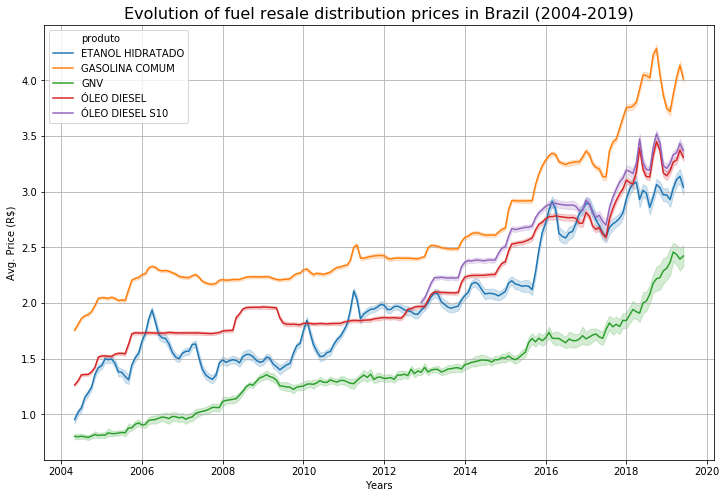

In [32]:
#Evolução do preço  de distribuição dos combustíveis no Brasil em todo o período.

plt.figure(figsize = [12,8])
sb.lineplot(data = gas[gas.produto!="GLP"], x = 'data_base', y = 'preco_medio_distribuicao', hue = 'produto')
plt.grid(True);
plt.xlabel('Years'),plt.ylabel('Avg. Price (R$)')
plt.title('Evolution of fuel resale distribution prices in Brazil (2004-2019)', fontsize =16);
plt.xticks(np.arange(start = np.datetime64("2004-05-01"), stop = np.datetime64("2019-06-01"),step = timedelta(years = 2)));


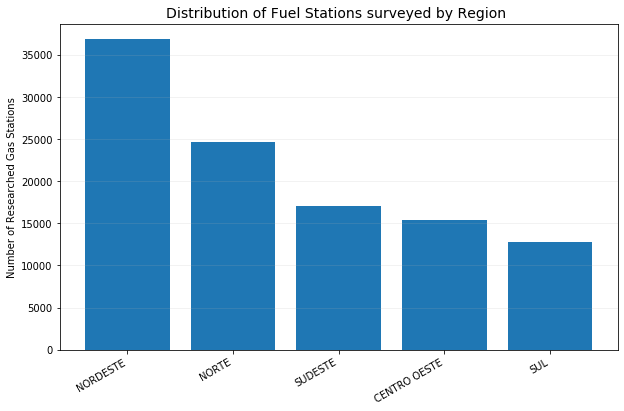

In [29]:
#Analisando o número de observações em cada região

posto_analise = gas.regiao.value_counts() #criando um df a partir da contagem dos valores por região
label = posto_analise.index.tolist()  #criando uma lista com os nomes das regiões
value = posto_analise.tolist() #outra lista com os valores de cada região. 

plt.figure(figsize = (10,6))
plt.bar(label, value)
plt.title('Distribution of Fuel Stations surveyed by Region ', fontsize = 14)
plt.xticks(rotation = 30,ha='right')
plt.ylabel('Number of Researched Gas Stations')
plt.grid(True, axis = 'y', alpha = 0.2)

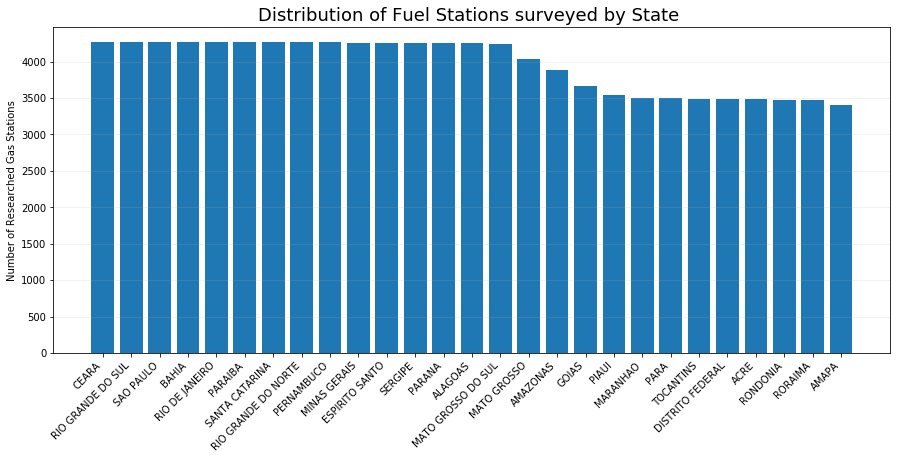

In [30]:
#Analisando o número de observações em cada estado

posto_analise_regiao = gas.estado.value_counts() #criando um df a partir da contagem dos valores por estado
label = posto_analise_regiao.index.tolist()  #criando uma lista com os nomes dos estados
value = posto_analise_regiao.tolist() #outra lista com os valores de cada estado. 

plt.figure(figsize = (15,6))
plt.bar(label, value)
plt.title('Distribution of Fuel Stations surveyed by State ', fontsize = 18)
plt.xticks(rotation = 45, ha='right')
plt.ylabel('Number of Researched Gas Stations')
plt.grid(True, axis = 'y', alpha = 0.2)

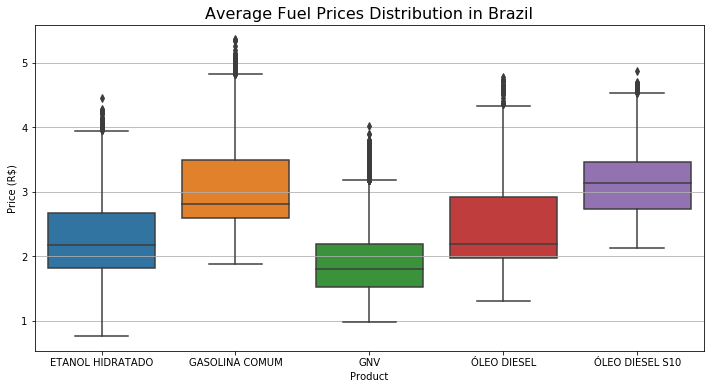

In [31]:
#Boxplot dos preços 

plt.figure(figsize = (12,6))
sb.boxplot(data = gas[gas.produto!="GLP"], x = 'produto', y = 'preco_medio_revenda');
plt.title('Average Fuel Prices Distribution in Brazil',fontsize = 16)
plt.xlabel('Product')
plt.ylabel('Price (R$)')
plt.grid(True, axis = 'y');

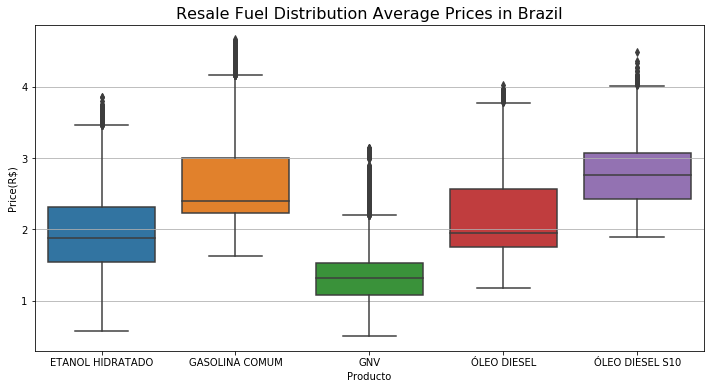

In [33]:
#Boxplot dos preços de distribuição

plt.figure(figsize = (12,6))
sb.boxplot(data = gas[gas.produto!="GLP"], x = 'produto', y = 'preco_medio_distribuicao');
plt.title('Resale Fuel Distribution Average Prices in Brazil',fontsize = 16)
plt.xlabel('Producto')
plt.ylabel('Price(R$)')

plt.grid(True, axis = 'y');

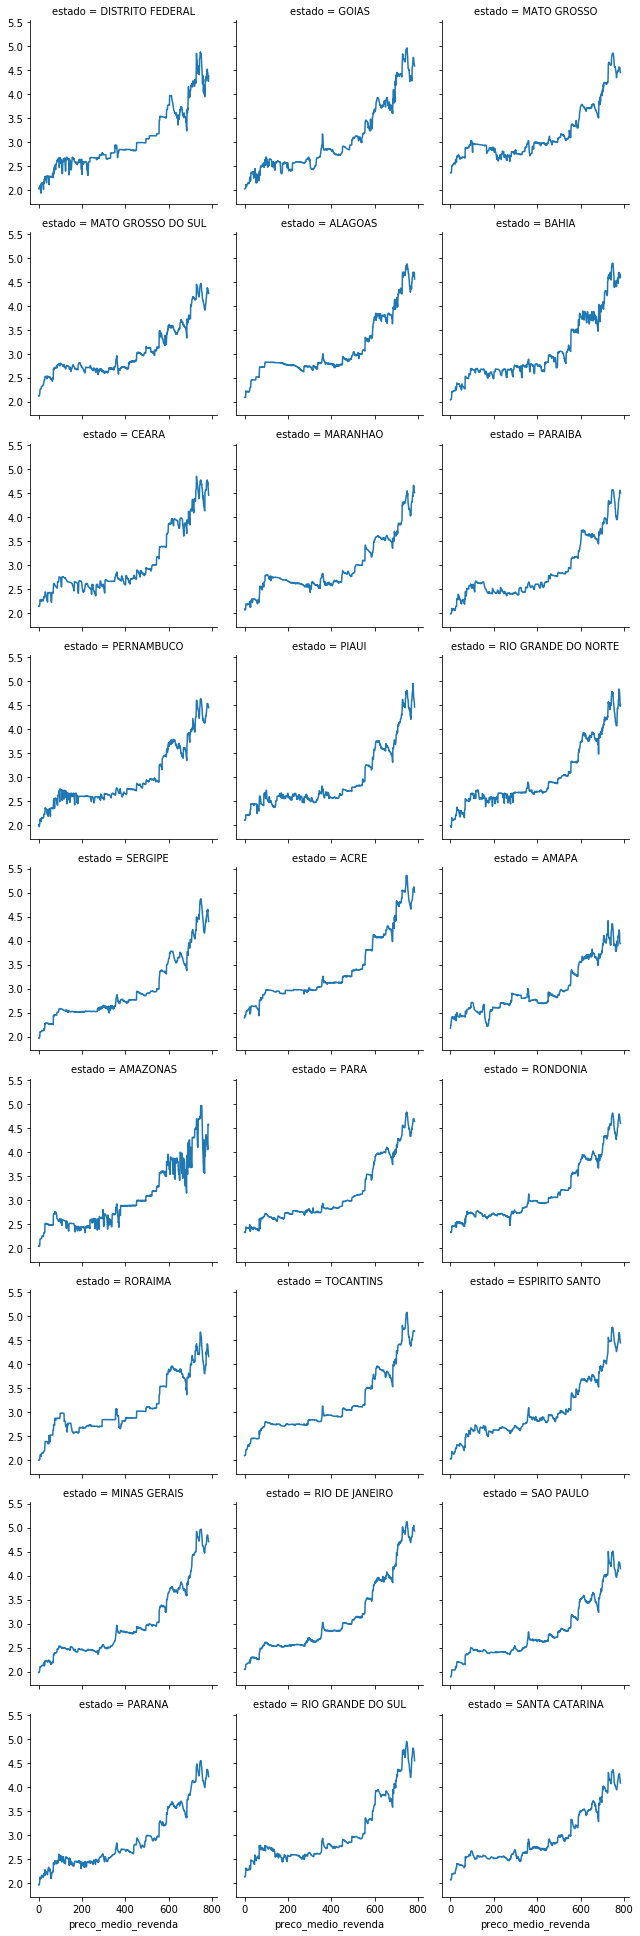

In [36]:
#Analisando a evolução de preço médio de gasolina por estado no período de 2004 a 2019.
#Analyzing the evolution of average gasoline price per state in the period from 2004 to 2019.

g = sb.FacetGrid(data = gas[gas.produto == "GASOLINA COMUM"], col = 'estado', col_wrap = 3 );
g.map(plt.plot,'preco_medio_revenda');
plt.savefig('price_evolution_per_state.png');

## Conclusions


> Gasoline is the most expensive fuel in Brazil.

> From 2004 to 2014 the prices kept controlled, but from 2015 to 2019 we can see how it skyrocketed. This have many correlations with Brazil's 00s increasing economy, and 10s crisis.

> The states of Norte macroregion have the lowest average of observed gas stations. This might happen due the smaller population compared to other regions, such as Sudeste.

> Ethanol is not derived from oil, that's why is cheaper. But we can see that it had more oscilations in the very first 10 years compared to the oil-based fuels.

> Despite Rio de Janeiro being Brazil's most oil producer, it has one of the highest gasoline prices all over the country.

## Sources and Inspiration: 

https://www.kaggle.com/gclindsey/geospatial-analysis-of-gas-prices-in-brazil

https://www.youtube.com/watch?v=fckFWZ_dLg4